# Network Analysis Project Overview

Network analysis is a discipline of mathematics that is studied to identify relations among social structures through the use of networks and graph theory. For our project, we are broadly interested in exploring network-linked data to explore clustering methods, that is the aggregation of dense groups in our data, building a clustering algorithm to be tested against current clustering methods in practice, as well as exploring advanced visualization techniques to examine the complex relationships in our data. 

## Example:

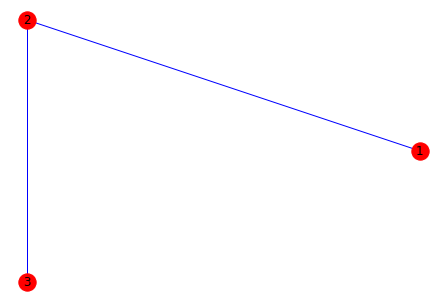

In [60]:
import networkx as nx
import matplotlib.pyplot as plt
G = nx.Graph()
G.add_edge(1, 2)  # default edge data=1
G.add_edge(2, 3, weight=0.9)
nx.draw(G, pos=nx.circular_layout(G), node_color='r', edge_color='b', with_labels = True)

# §1. Load Dependencies

In [27]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# §2. Comparing Spiders

> **Error from IMDB Scraper in Blog Post 2: Includes both American and Japanese voice actors**

Temporary Solution: Introduce new condition to check if an actor was born in Japan.


## 2a. All Voice Actors

In [28]:
def parse_actor_page_all(self, response):
    
        # Iterate through all of the projects
        for project in response.css("div.filmo-category-section")[0].css("b a::text"):
            actor_name = response.css("span.itemprop::text").get() # Get actor name
            movie_or_TV_name = project.get() # Get project title

        # Yield results in a dictionary
            yield {
                "actor" : actor_name,
                "movie_or_TV_name" : movie_or_TV_name
            }

In [29]:
# Run web scraper on imdb site to get voice actor - anime relations
# Data = List of directed edges
url = "web_scraper/results.csv"
df = pd.read_csv(url)
df.head()

,actor,movie_or_TV_name
0,Maile Flanagan,My Babysitter the Super Hero
1,Maile Flanagan,Work Wife
2,Maile Flanagan,The Loud House
3,Maile Flanagan,Barbie & Kendra Save the Tiger King
4,Maile Flanagan,Boruto: Naruto Next Generations


In [30]:
df.shape

(63145, 2)

In [31]:
# Number of unique voice actors
len(df.actor.unique())

511

As we can see this produces a long list of voice actors 

## 2b. Japanese Voice Actors

In [32]:
def parse_actor_page_japan(self, response):
        
        # If voice actor is from Japan procced
        if response.css("div#name-born-info.txt-block").css("a::text")[2].get().split(", ")[1] == "Japan":
            # Iterate through all of the projects
            for project in response.css("div.filmo-category-section")[0].css("b a::text"):
                actor_name = response.css("span.itemprop::text").get() # Get actor name
                movie_or_TV_name = project.get() # Get project title

            # Yield results in a dictionary
                yield {
                    "actor" : actor_name,
                    "movie_or_TV_name" : movie_or_TV_name
                }
        else:
            pass

In [33]:
# Run web scraper on imdb site to get voice actor - anime relations
# Data = List of directed edges
url = "web_scraper/new_results.csv"
df = pd.read_csv(url)
df.head()

,actor,movie_or_TV_name
0,Kazuhiko Inoue,Granblue Fantasy: Relink
1,Kazuhiko Inoue,Tsukimichi: Moonlit Fantasy
2,Kazuhiko Inoue,Boruto: Naruto Next Generations
3,Kazuhiko Inoue,Bravely Default II
4,Kazuhiko Inoue,Attack on Titan


In [34]:
df.shape

(23055, 2)

In [35]:
# Number of unique voice actors
len(df.actor.unique())

186

This new parser significantly cuts down the number of voice actors as well as rows of data

# §3. Building a Graph from Data

In [36]:
# Run web scraper on imdb site to get voice actor - anime relations
# Data = List of directed edges
url = "web_scraper/new_results.csv"
df = pd.read_csv(url)
df.head()

,actor,movie_or_TV_name
0,Kazuhiko Inoue,Granblue Fantasy: Relink
1,Kazuhiko Inoue,Tsukimichi: Moonlit Fantasy
2,Kazuhiko Inoue,Boruto: Naruto Next Generations
3,Kazuhiko Inoue,Bravely Default II
4,Kazuhiko Inoue,Attack on Titan


In [43]:
# Let's visualize 100 random relations
DG = nx.from_pandas_edgelist(df.sample(n=100), 
                             source = "actor", 
                             target = "movie_or_TV_name", 
                             edge_attr=None, 
                             create_using=nx.DiGraph())

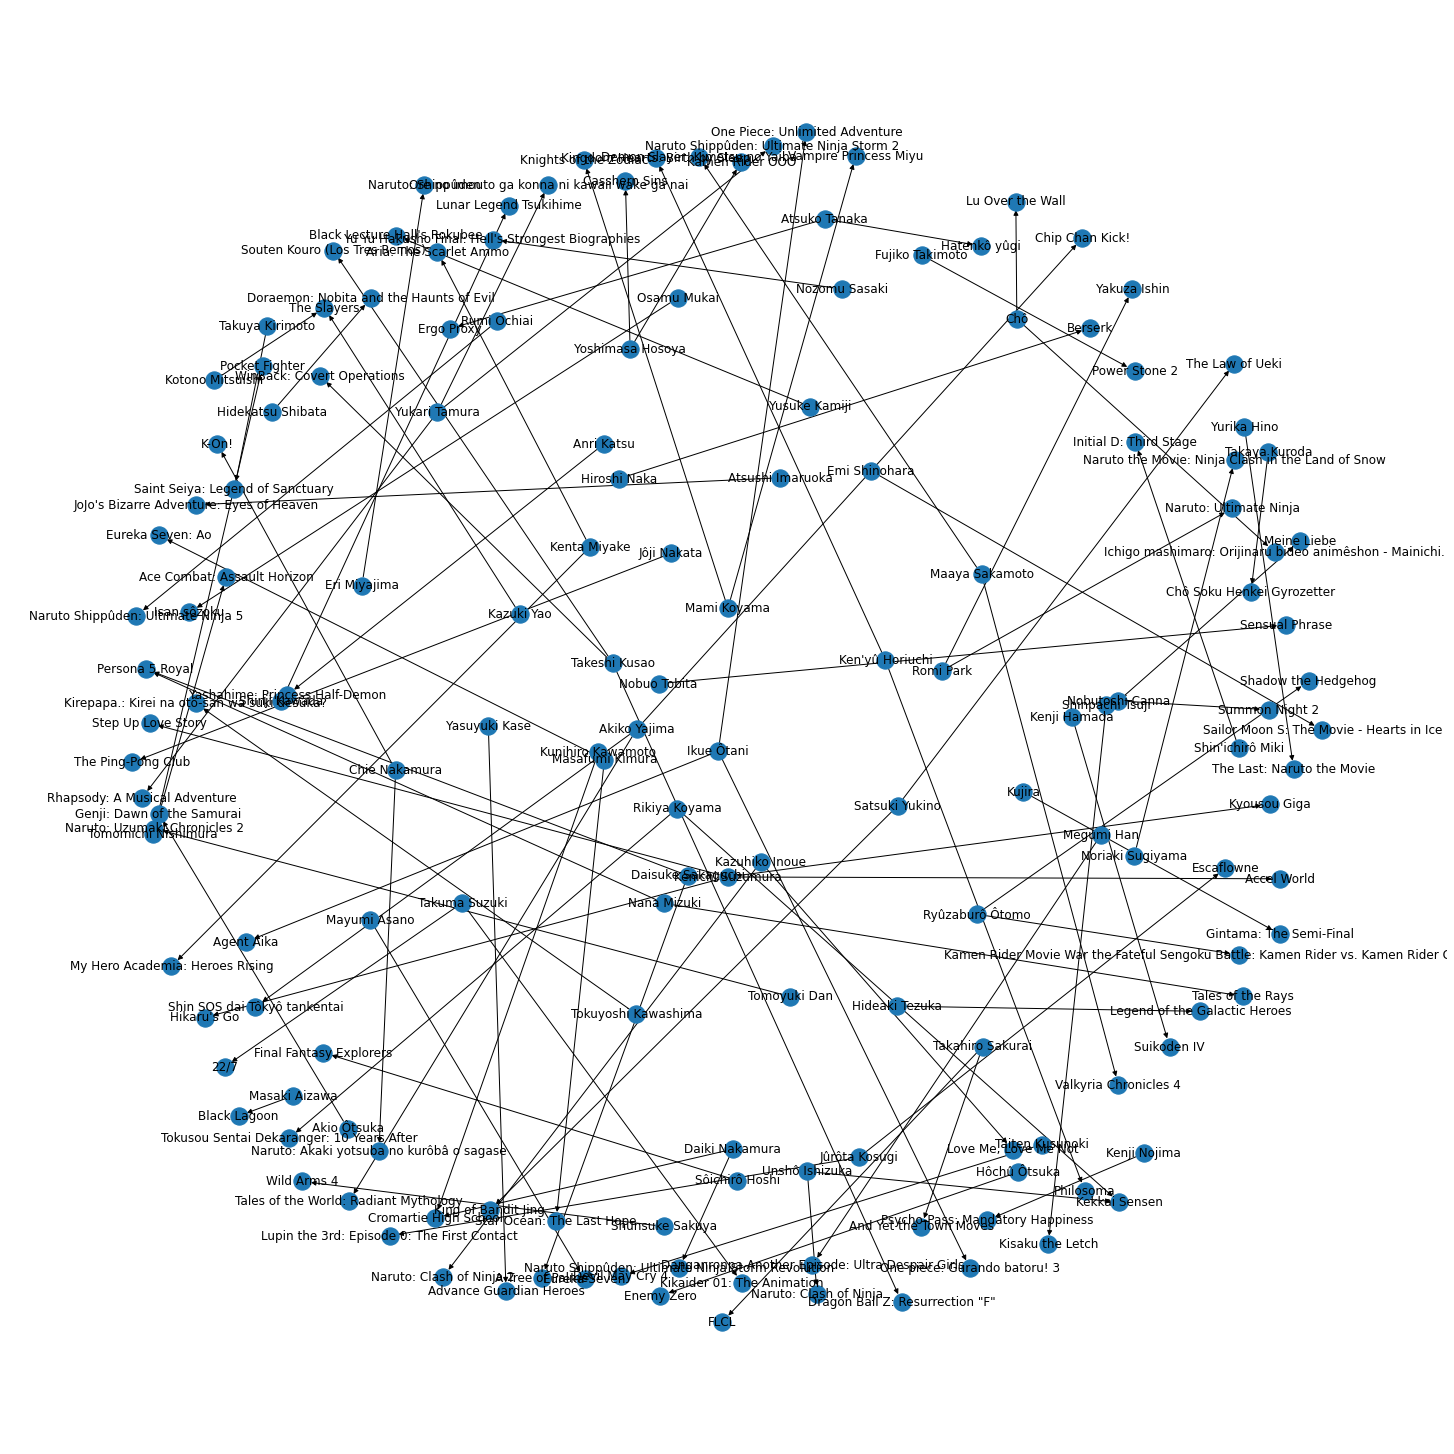

In [48]:
plt.figure(figsize=(20, 20))
pos=nx.spring_layout(DG, k=0.50)
nx.draw(DG, pos, with_labels = True)

# §4. Exploratory Analysis

In [39]:
# Adjacency matrix
A = nx.convert_matrix.to_numpy_matrix(DG)

In [40]:
A.shape

(95, 95)

In [41]:
A

matrix([[0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [42]:
eigs = np.linalg.eig(A)
ix = np.argsort(eigs[0])

eig_centrality = eigs[1][ix][:,0]

# need to convert to real, by default eigs are complex
# A is symmetric, so the imaginary parts are always 0
eig_centrality = np.real(eig_centrality)